# Kaplan Meier Estimate

To estimate survival function

In [37]:
import pandas as pd
from lifelines.datasets import load_dd
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

In [2]:
data = load_dd()

In [3]:
data.head()

,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
0,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1946.1952.Mona...,Non-democracy,Monarchy,1946,7,1
1,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1953.1962.Ci...,Non-democracy,Civilian Dict,1953,10,1
2,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1963.1972.Mona...,Non-democracy,Monarchy,1963,10,1
3,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1973.1977.Ci...,Non-democracy,Civilian Dict,1973,5,0
4,Afghanistan,700,700.0,Southern Asia,Asia,Nur Mohammad Taraki,Nur Mohammad Taraki.Afghanistan.1978.1978.Civi...,Non-democracy,Civilian Dict,1978,1,0


In [4]:
data.shape

(1808, 12)

In [6]:
data['observed'].value_counts()

1    1468
0     340
Name: observed, dtype: int64

In [9]:
from lifelines import KaplanMeierFitter

# Other ways to estimate the survival function in lifelines are 
# BreslowFlemingHarringtonFitter, WeibullFitter, ExponentialFitter

In [8]:
kmf = KaplanMeierFitter()

In [11]:
?KaplanMeierFitter.fit()

Signature: KaplanMeierFitter.fit(self, durations, event_observed=None, timeline=None, entry=None, label='KM_estimate', alpha=None, left_censorship=False, ci_labels=None, weights=None)
Docstring:
Parameters:
  duration: an array, or pd.Series, of length n -- duration subject was observed for
  timeline: return the best estimate at the values in timelines (postively increasing)
  event_observed: an array, or pd.Series, of length n -- True if the the death was observed, False if the event
     was lost (right-censored). Defaults all True if event_observed==None
  entry: an array, or pd.Series, of length n -- relative time when a subject entered the study. This is
     useful for left-truncated (not left-censored) observations. If None, all members of the population
     were born at time 0.
  label: a string to name the column of the estimate.
  alpha: the alpha value in the confidence intervals. Overrides the initializing
     alpha for this call to fit only.
  left_censorship: True if d

In [12]:
kmf.fit(data['duration'], data['observed'])

<lifelines.KaplanMeierFitter: fitted with 1808 observations, 340 censored>

In [14]:
# returns the survival function estimate
kmf.survival_function_

,KM_estimate
timeline,
0.0,1.000000
1.0,0.721792
2.0,0.601973
3.0,0.510929
4.0,0.418835
5.0,0.334008
6.0,0.280902
7.0,0.256825
8.0,0.221975


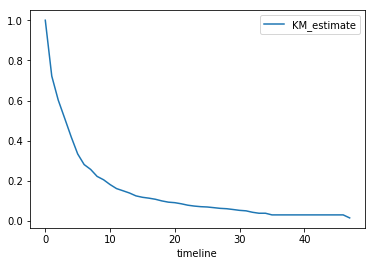

In [18]:
# plotting it raw

kmf.survival_function_.plot()

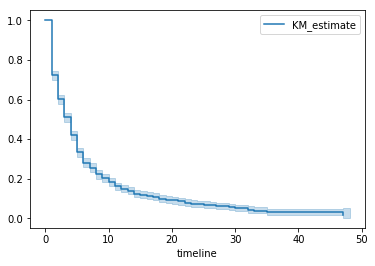

In [19]:
# plotting it with confidence intervals

kmf.plot()

In [20]:
# median time in office
#The median time in office, which defines the point in time where on 
# average 1/2 of the population has expired

kmf.median_

4.0

Interesting that it is only three years. That means, around the world, elected leaders have a 50% chance of cessation in three years!

## Plotting by Groups

### Democratic vs Non-democratic

Similar to sksurv, need to subset and plot twice

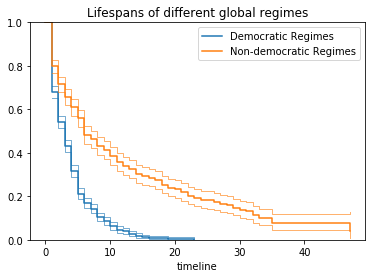

In [29]:
ax = plt.subplot(111)

T = data["duration"]
E = data["observed"]

dem = (data["democracy"] == "Democracy")
kmf.fit(T[dem], event_observed=E[dem], label="Democratic Regimes")
kmf.plot(ax=ax, ci_force_lines=True)
kmf.fit(T[~dem], event_observed=E[~dem], label="Non-democratic Regimes")
kmf.plot(ax=ax, ci_force_lines=True)

plt.ylim(0, 1);
plt.title("Lifespans of different global regimes");


Median time of democratic:  3.0
Median time of non democratic:  6.0


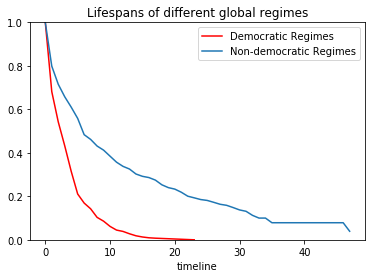

In [36]:
# without CI

ax = plt.subplot(111)

T = data["duration"]
E = data["observed"]

dem = (data["democracy"] == "Democracy")
kmf.fit(T[dem], event_observed=E[dem], label="Democratic Regimes")
print('Median time of democratic: ', kmf.median_)
kmf.survival_function_.plot(ax=ax, color = 'red')
kmf.fit(T[~dem], event_observed=E[~dem], label="Non-democratic Regimes")
kmf.survival_function_.plot(ax=ax)
print('Median time of non democratic: ', kmf.median_)


plt.ylim(0, 1);
plt.title("Lifespans of different global regimes");

### Deep dive to specific timelines

We might be interested in estimating the probabilities in between some points. We can do that with the `timeline` argument. We specify the times we are interested in and are returned a DataFrame with the probabilities of survival at those points

Median survival time of democratic: 3.0
Median survival time of non-democratic: 6.0


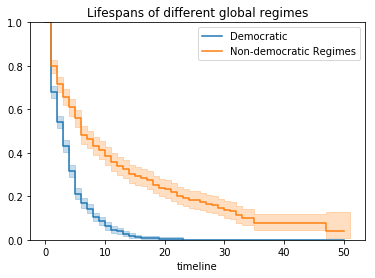

In [42]:
ax = plt.subplot(111)

t = np.linspace(0, 50, 51)

kmf.fit(T[dem], event_observed=E[dem], timeline=t, label='Democratic')
kmf.plot(ax=ax)
print("Median survival time of democratic:", kmf.median_)

kmf.fit(T[~dem], event_observed=E[~dem], timeline=t, label="Non-democratic Regimes")
ax = kmf.plot(ax=ax)
print("Median survival time of non-democratic:", kmf.median_)

plt.ylim(0,1)
plt.title("Lifespans of different global regimes");

# Statistical Test

Here the difference between survival functions is very obvious, and performing a statistical test seems pedantic. If the curves are more similar, or we possess less data, we may be interested in performing a statistical test

## Logrank

The function `logrank_test` is a common statistical test in survival analysis that compares two event series’ generators. If the value returned exceeds some pre-specified value, then we rule that the series have different generators.

In [48]:
# When two survival curves are statistically significant different at a 1% alpha

from lifelines.statistics import logrank_test

results = logrank_test(T[dem], T[~dem], E[dem], E[~dem], alpha=.99)

results.print_summary()


t_0=-1, alpha=0.99, null_distribution=chi squared, df=1

test_statistic      p     
      260.4695 0.0000  ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 


In [47]:
?logrank_test

Signature: logrank_test(event_times_A, event_times_B, event_observed_A=None, event_observed_B=None, alpha=0.95, t_0=-1, **kwargs)
Docstring:
Measures and reports on whether two intensity processes are different. That is, given two
event series, determines whether the data generating processes are statistically different.
The test-statistic is chi-squared under the null hypothesis.

H_0: both event series are from the same generating processes
H_A: the event series are from different generating processes.

See Survival and Event Analysis, page 108. This implicitly uses the log-rank weights.

Parameters:
  event_times_foo: a (nx1) array of event durations (birth to death,...) for the population.
  censorship_bar: a (nx1) array of censorship flags, 1 if observed, 0 if not. Default assumes all observed.
  t_0: the period under observation, -1 for all time.
  alpha: the level of signifiance
  kwargs: add keywords and meta-data to the experiment summary

Returns:
  results: a StatisticalResu

In [50]:
# when curves are too similar

results = logrank_test(T[dem], T[dem], E[dem], E[dem], alpha=.99)

results.print_summary()


t_0=-1, alpha=0.99, null_distribution=chi squared, df=1

test_statistic      p   
        0.0000 1.0000
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 


# Use of for loop to plot

# One chart

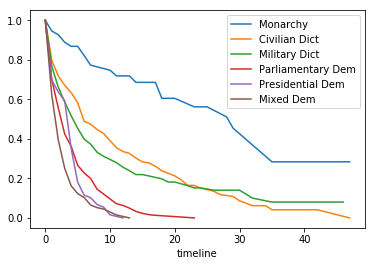

In [57]:
ax = plt.subplot(111)

for regime in data['regime'].unique():
    ix = data['regime'] == regime
    kmf.fit(T[ix], E[ix], label = regime)
    kmf.survival_function_.plot(ax=ax, legend = True)

# Multiple Subplots

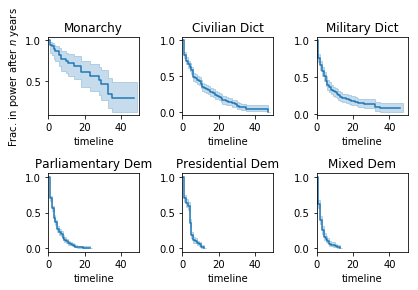

In [58]:
regime_types = data['regime'].unique()

for i,regime_type in enumerate(regime_types):
    ax = plt.subplot(2, 3, i+1)
    ix = data['regime'] == regime_type
    kmf.fit( T[ix], E[ix], label=regime_type)
    kmf.plot(ax=ax, legend=False)
    plt.title(regime_type)
    plt.xlim(0, 50)
    if i==0:
        plt.ylabel('Frac. in power after $n$ years')
plt.tight_layout()

# Weibull Estimator (parametric)

In [59]:
from lifelines import WeibullFitter

T = data['duration']
E = data['observed']

wf = WeibullFitter()
wf.fit(T, E)
print(wf.lambda_, wf.rho_)
wf.print_summary()

0.16366017864852916 0.9426463466874141
n=1808, number of events=1468

          coef  se(coef)  lower 0.95  upper 0.95
lambda_ 0.1637    0.0046      0.1546      0.1727
rho_    0.9426    0.0180      0.9074      0.9779


# Hazard Rate Curve using Nelson-Aalen Fitter

Sinonymous to Hazard Curve

The hazard function, conventionally denoted {\displaystyle \lambda } \lambda , is defined as the event rate at time t conditional on survival until time t or later (that is, T ≥ t). Suppose that an item has survived for a time t and we desire the probability that it will not survive for an additional time dt:

A hazard ratio of 3 means that three times the number of events are seen in the treatment group at any point in time. In other words, the treatment will cause the patient to progress three times as fast as patients in the control group. Any ratio above 1 generally means that the treatment group healed faster or had a slower time to an event.

Basically relative risk

> Democratic is x times higher chance of death than Non Democratic

          NA_estimate
timeline             
0.0          0.000000
1.0          0.325912
2.0          0.507356
3.0          0.671251
4.0          0.869867


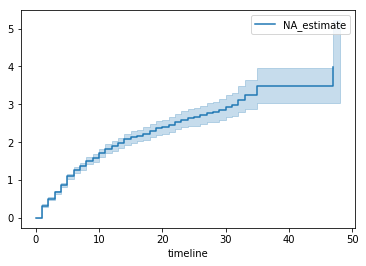

In [60]:
from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()

naf.fit(T,event_observed=E)

print(naf.cumulative_hazard_.head())
naf.plot()

Looking at figure above, it looks like the hazard starts off high and gets smaller (as seen by the decreasing rate of change)

## Hazard Function by Group

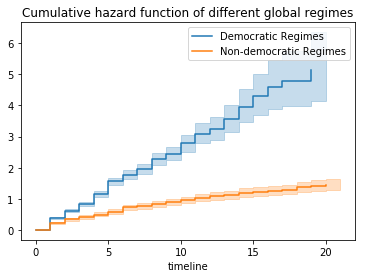

In [63]:
naf.fit(T[dem], event_observed=E[dem], label="Democratic Regimes")
ax = naf.plot(loc=slice(0, 20))
naf.fit(T[~dem], event_observed=E[~dem], label="Non-democratic Regimes")
naf.plot(ax=ax, loc=slice(0, 20))
plt.title("Cumulative hazard function of different global regimes");

Looking at the rates of change, I would say that both political philosophies have a constant hazard, albeit democratic regimes have a much higher constant hazard. So why did the combination of both regimes have a decreasing hazard?

# Survival Regression

the technique is called survival regression – the name implies we regress covariates (e.g., year elected, country, etc.) against a another variable – in this case durations and lifetimes.

## Cox’s Proportional Hazard model


In [64]:
from lifelines.datasets import load_rossi
from lifelines import CoxPHFitter

In [66]:
load_rossi().head()

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


In [65]:
?CoxPHFitter.fit()

Signature: CoxPHFitter.fit(self, df, duration_col, event_col=None, show_progress=False, initial_beta=None, strata=None, step_size=None, weights_col=None)
Docstring:
Fit the Cox Propertional Hazard model to a dataset. Tied survival times
are handled using Efron's tie-method.

Parameters:
  df: a Pandas dataframe with necessary columns `duration_col` and
     `event_col`, plus other covariates. `duration_col` refers to
     the lifetimes of the subjects. `event_col` refers to whether
     the 'death' events was observed: 1 if observed, 0 else (censored).
  duration_col: the column in dataframe that contains the subjects'
     lifetimes.
  event_col: the column in dataframe that contains the subjects' death
     observation. If left as None, assume all individuals are non-censored.
  weights_col: an optional column in the dataframe that denotes the weight per subject.
     This column is expelled and not used as a covariate, but as a weight in the
     final regression. Default weight is 

In [67]:
rossi_dataset = load_rossi()
cph = CoxPHFitter()
cph.fit(rossi_dataset, duration_col = 'week', event_col = 'arrest', show_progress=True)

Iteration 1: norm_delta = 0.48337, step_size = 0.95000, ll = -675.38063, seconds_since_start = 0.0
Iteration 2: norm_delta = 0.13160, step_size = 0.95000, ll = -659.79004, seconds_since_start = 0.0
Iteration 3: norm_delta = 0.01712, step_size = 0.95000, ll = -658.76197, seconds_since_start = 0.0
Iteration 4: norm_delta = 0.00103, step_size = 0.95000, ll = -658.74771, seconds_since_start = 0.1
Iteration 5: norm_delta = 0.00005, step_size = 0.95000, ll = -658.74766, seconds_since_start = 0.1
Iteration 6: norm_delta = 0.00000, step_size = 0.95000, ll = -658.74766, seconds_since_start = 0.1
Convergence completed after 6 iterations.


<lifelines.CoxPHFitter: fitted with 432 observations, 318 censored>

In [68]:
cph.print_summary()

n=432, number of events=114

        coef  exp(coef)  se(coef)       z      p  lower 0.95  upper 0.95    
fin  -0.3794     0.6843    0.1914 -1.9826 0.0474     -0.7545     -0.0043   *
age  -0.0574     0.9442    0.0220 -2.6109 0.0090     -0.1006     -0.0143  **
race  0.3139     1.3688    0.3080  1.0192 0.3081     -0.2898      0.9176    
wexp -0.1498     0.8609    0.2122 -0.7058 0.4803     -0.5657      0.2662    
mar  -0.4337     0.6481    0.3819 -1.1357 0.2561     -1.1822      0.3147    
paro -0.0849     0.9186    0.1958 -0.4336 0.6646     -0.4685      0.2988    
prio  0.0915     1.0958    0.0286  3.1938 0.0014      0.0353      0.1476  **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Concordance = 0.640
Likelihood ratio test = 33.266 on 7 df, p=0.00002


In [76]:
cph.score_

0.6403292470997135

### Interpretation

https://www.statsdirect.com/help/survival_analysis/cox_regression.htm

**Cumulative hazard** at a time t is the risk of dying between time 0 and time t, and the survivor function at time t is the probability of surviving to time t (see also Kaplan-Meier estimates).

The coefficients in a Cox regression relate to hazard; a positive coefficient indicates a worse prognosis and a negative coefficient indicates a protective effect of the variable with which it is associated.

# Goodness of Fit

Besides looking at concordance index, we can compare spread between the baseline survival function vs the Kaplan Meier survival function (Why? a small spread between these two curves means that the impact of the exponential in the Cox model does very little, whereas a large spread means most of the changes in individual hazard can be attributed to the exponential term). For example, the first figure below is a good fit, and the second figure is a much weaker fit.

After fitting, you can use use the suite of prediction methods (similar to Aalen’s additive model): `.predict_partial_hazard, .predict_survival_function`, etc.

![](https://lifelines.readthedocs.io/en/latest/_images/goodfit.png)

![](https://lifelines.readthedocs.io/en/latest/_images/badfit.png)

In [81]:
X = rossi_dataset.drop(['week', 'arrest'], axis =1)

cph.predict_partial_hazard(X)

,0
0,1.219126
1,3.230250
2,3.031058
3,0.487712
4,1.214024
5,1.238655
6,0.579853
7,1.110755
8,2.327246
9,1.297945


In [87]:
cph.predict_survival_function(X)

,0,1,2,3,4,5,6,7,8,9,...,422,423,424,425,426,427,428,429,430,431
event_at,,,,,,,,,,,,,,,,,,,,,
0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1.0,0.997616,0.993695,0.994083,0.999045,0.997626,0.997578,0.998865,0.997827,0.995453,0.997462,...,0.997826,0.996005,0.996031,0.997774,0.998892,0.999184,0.997033,0.998866,0.998170,0.998610
2.0,0.995230,0.987411,0.988183,0.998089,0.995250,0.995154,0.997728,0.995653,0.990914,0.994922,...,0.995649,0.992014,0.992067,0.995547,0.997782,0.998366,0.994065,0.997730,0.996337,0.997217
3.0,0.992848,0.981162,0.982314,0.997133,0.992878,0.992734,0.996592,0.993482,0.986392,0.992388,...,0.993476,0.988037,0.988115,0.993324,0.996673,0.997548,0.991105,0.996595,0.994507,0.995826
4.0,0.990468,0.974941,0.976468,0.996176,0.990507,0.990316,0.995455,0.991311,0.981882,0.989855,...,0.991304,0.984067,0.984171,0.991100,0.995563,0.996729,0.988147,0.995458,0.992676,0.994433
5.0,0.988085,0.968739,0.970639,0.995216,0.988135,0.987895,0.994315,0.989139,0.977378,0.987320,...,0.989129,0.980101,0.980231,0.988875,0.994450,0.995909,0.985189,0.994319,0.990843,0.993039
6.0,0.985699,0.962552,0.964820,0.994254,0.985758,0.985471,0.993172,0.986961,0.972877,0.984781,...,0.986950,0.976134,0.976290,0.986645,0.993334,0.995085,0.982227,0.993177,0.989006,0.991640
7.0,0.983305,0.956370,0.959004,0.993287,0.983374,0.983039,0.992024,0.984777,0.968371,0.982235,...,0.984764,0.972162,0.972343,0.984409,0.992213,0.994258,0.979258,0.992030,0.987162,0.990236
8.0,0.971402,0.926001,0.930402,0.988460,0.971520,0.970950,0.986294,0.973910,0.946118,0.969581,...,0.973888,0.952510,0.952816,0.973282,0.986619,0.990125,0.964523,0.986304,0.977978,0.983232


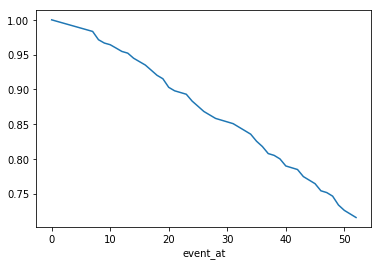

In [88]:
cph.predict_survival_function(X)[0].plot()

# Plotting Coefficients

In [89]:
cph.print_summary()

n=432, number of events=114

        coef  exp(coef)  se(coef)       z      p  lower 0.95  upper 0.95    
fin  -0.3794     0.6843    0.1914 -1.9826 0.0474     -0.7545     -0.0043   *
age  -0.0574     0.9442    0.0220 -2.6109 0.0090     -0.1006     -0.0143  **
race  0.3139     1.3688    0.3080  1.0192 0.3081     -0.2898      0.9176    
wexp -0.1498     0.8609    0.2122 -0.7058 0.4803     -0.5657      0.2662    
mar  -0.4337     0.6481    0.3819 -1.1357 0.2561     -1.1822      0.3147    
paro -0.0849     0.9186    0.1958 -0.4336 0.6646     -0.4685      0.2988    
prio  0.0915     1.0958    0.0286  3.1938 0.0014      0.0353      0.1476  **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Concordance = 0.640
Likelihood ratio test = 33.266 on 7 df, p=0.00002


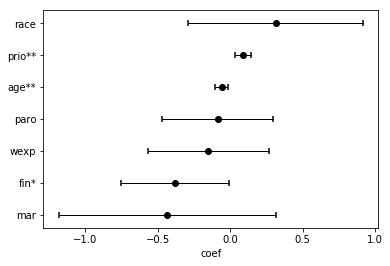

In [90]:
cph.plot()

# Effect of Varying Covariate (only for numerical columns)

In [92]:
rossi_dataset['prio'].unique()

array([ 3,  8, 13,  1,  2,  0,  4,  6,  5,  7, 12,  9, 14, 15, 10, 11, 18])

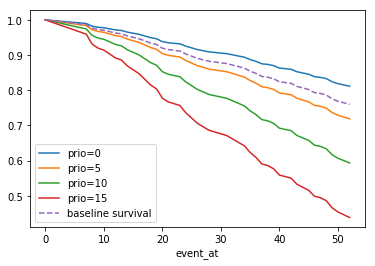

In [93]:
cph.plot_covariate_groups('prio', [0, 5, 10, 15])


This means increasing prio increasing death rate

The survival/survivorship function and the cumulative hazard function (as discussed under Kaplan-Meier) are calculated relative to the baseline (lowest value of covariates) at each time point. **Cox regression provides a better estimate of these functions than the Kaplan-Meier method when the assumptions of the Cox model are met and the fit of the model is strong.**

# Proportional Hazard Assumption Test

https://www.stat.ubc.ca/~rollin/teach/643w04/lec/node69.html

A quick and visual way to check the proportional hazards assumption of a variable is to plot the survival curves segmented by the values of the variable. If the survival curves are the same “shape” and differ only by a constant factor, then the assumption holds. A more clear way to see this is to plot what’s called the logs curve: the loglogs (-log(survival curve)) vs log(time). If the curves are parallel (and hence do not cross each other), then it’s likely the variable satisfies the assumption. If the curves do cross, likely you’ll have to “stratify” the variable (see next section). In lifelines, the KaplanMeierFitter object has a .plot_loglogs function for this purpose.

The following is the loglogs curves of two variables in our regime dataset. The first is the democracy type, which does have (close to) parallel lines, hence satisfies our assumption:

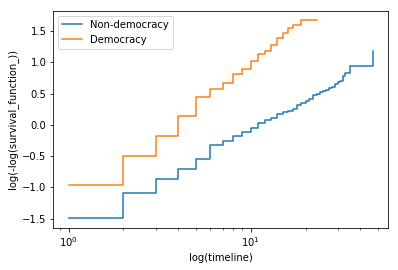

In [96]:
democracy_0 = data.loc[data['democracy'] == 'Non-democracy']
democracy_1 = data.loc[data['democracy'] == 'Democracy']

kmf0 = KaplanMeierFitter()
kmf0.fit(democracy_0['duration'], event_observed=democracy_0['observed'])

kmf1 = KaplanMeierFitter()
kmf1.fit(democracy_1['duration'], event_observed=democracy_1['observed'])

fig, axes = plt.subplots()
kmf0.plot_loglogs(ax=axes)
kmf1.plot_loglogs(ax=axes)

axes.legend(['Non-democracy', 'Democracy'])

plt.show()

# Excluding Variables (Stratification)

In [97]:
cph.fit(rossi_dataset, 'week', event_col='arrest', strata=['race'], show_progress=True)

cph.print_summary()  # access the results using cph.summary

Iteration 1: norm_delta = 0.47598, step_size = 0.95000, ll = -636.92697, seconds_since_start = 0.0
Iteration 2: norm_delta = 0.13026, step_size = 0.95000, ll = -621.59413, seconds_since_start = 0.0
Iteration 3: norm_delta = 0.01679, step_size = 0.95000, ll = -620.57773, seconds_since_start = 0.0
Iteration 4: norm_delta = 0.00100, step_size = 0.95000, ll = -620.56366, seconds_since_start = 0.1
Iteration 5: norm_delta = 0.00005, step_size = 0.95000, ll = -620.56361, seconds_since_start = 0.1
Iteration 6: norm_delta = 0.00000, step_size = 0.95000, ll = -620.56361, seconds_since_start = 0.1
Convergence completed after 6 iterations.
n=432, number of events=114

        coef  exp(coef)  se(coef)       z      p  lower 0.95  upper 0.95    
fin  -0.3788     0.6847    0.1913 -1.9799 0.0477     -0.7537     -0.0038   *
age  -0.0576     0.9440    0.0220 -2.6197 0.0088     -0.1008     -0.0145  **
wexp -0.1427     0.8670    0.2128 -0.6708 0.5023     -0.5598      0.2743    
mar  -0.4388     0.6448    

In [99]:
cph.summary

,coef,exp(coef),se(coef),z,p,lower 0.95,upper 0.95
fin,-0.378767,0.684705,0.191304,-1.979927,0.047712,-0.753716,-0.003819
age,-0.057640,0.943990,0.022002,-2.619742,0.008800,-0.100763,-0.014516
wexp,-0.142750,0.866971,0.212794,-0.670837,0.502324,-0.559818,0.274318
mar,-0.438817,0.644799,0.382127,-1.148352,0.250823,-1.187772,0.310139
paro,-0.085764,0.917811,0.195807,-0.438002,0.661385,-0.469539,0.298011
prio,0.092214,1.096599,0.028726,3.210115,0.001327,0.035912,0.148516


# Model Selection

If censorship is present, it’s not appropriate to use a loss function like mean-squared-error or mean-absolute-loss. Instead, one measure is the concordance-index, also known as the c-index. **This measure evaluates the accuracy of the ordering of predicted time.** It is infact a generalization of AUC, another common loss function, and is interpreted similarly:

0.5 is the expected result from random predictions,
1.0 is perfect concordance and,
0.0 is perfect anti-concordance (multiply predictions with -1 to get 1.0)

The measure is implemented in lifelines under lifelines.utils.concordance_index and accepts the actual times (along with any censorships) and the predicted times.

In [102]:
from lifelines.utils import concordance_index

In [103]:
?concordance_index

Signature: concordance_index(event_times, predicted_event_times, event_observed=None)
Docstring:
Calculates the concordance index (C-index) between two series
of event times. The first is the real survival times from
the experimental data, and the other is the predicted survival
times from a model of some kind.

The concordance index is a value between 0 and 1 where,
0.5 is the expected result from random predictions,
1.0 is perfect concordance and,
0.0 is perfect anti-concordance (multiply predictions with -1 to get 1.0)

Score is usually 0.6-0.7 for survival models.

See:
Harrell FE, Lee KL, Mark DB. Multivariable prognostic models: issues in
developing models, evaluating assumptions and adequacy, and measuring and
reducing errors. Statistics in Medicine 1996;15(4):361-87.

Parameters:
  event_times: a (n,) array of observed survival times.
  predicted_event_times: a (n,) array of predicted survival times.
  event_observed: a (n,) array of censorship flags, 1 if observed,
           

# Cross Validation

Lifelines has an implementation of k-fold cross validation under lifelines.utils.k_fold_cross_validation. This function accepts an instance of a regression fitter (either CoxPHFitter of AalenAdditiveFitter), a dataset, plus k (the number of folds to perform, default 5). On each fold, it splits the data into a training set and a testing set fits itself on the training set and evaluates itself on the testing set (using the concordance measure).

In [105]:
from lifelines.datasets import load_regression_dataset
from lifelines.utils import k_fold_cross_validation

regression_dataset = load_regression_dataset()
cph = CoxPHFitter()
scores = k_fold_cross_validation(cph, regression_dataset, 'T', event_col='E', k=3)
print(scores)
print(np.mean(scores))
print(np.std(scores))

[0.601024208566108, 0.5410579345088161, 0.5414610069101679]
0.5611810499950307
0.028173848163739783


In [107]:
regression_dataset.head()

,var1,var2,var3,T,E
0,0.595170,1.143472,1.571079,14.785479,1
1,0.209325,0.184677,0.356980,7.336734,1
2,0.693919,0.071893,0.557960,5.271527,1
3,0.443804,1.364646,0.374221,11.684168,1
4,1.613324,0.125566,1.921325,7.637764,1


In [109]:
cph.print_summary()

n=134, number of events=126

       coef  exp(coef)  se(coef)      z      p  lower 0.95  upper 0.95    
var1 0.1721     1.1878    0.0848 2.0304 0.0423      0.0060      0.3382   *
var2 0.1175     1.1247    0.1032 1.1388 0.2548     -0.0847      0.3197    
var3 0.2339     1.2635    0.0867 2.6971 0.0070      0.0639      0.4038  **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Concordance = 0.586
Likelihood ratio test = 12.091 on 3 df, p=0.00708
